# Task-3

In [1]:
%matplotlib inline

# Import Required Libraries

In [2]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Details of the Dataset

In [3]:
df = pd.read_csv("d:\Murtaza\Elevvo internship\Tasks\Task 3\Online Retail.xlsx\Online Retail.csv", encoding="ISO-8859-1")
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,01/12/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,01/12/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,01/12/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,01/12/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,01/12/2010 8:26,3.39,17850.0,United Kingdom


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [5]:
df.dtypes

InvoiceNo       object
StockCode       object
Description     object
Quantity         int64
InvoiceDate     object
UnitPrice      float64
CustomerID     float64
Country         object
dtype: object

In [6]:
df.describe()

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


In [7]:
from ydata_profiling import ProfileReport

report = ProfileReport(df, explorative=True)

# OR display inside a Jupyter Notebook
report.to_notebook_iframe()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

100%|██████████| 8/8 [00:19<00:00,  2.43s/it]


Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

# Data Cleaning

In [8]:
df.nunique()

InvoiceNo      25900
StockCode       4070
Description     4223
Quantity         722
InvoiceDate    23260
UnitPrice       1630
CustomerID      4372
Country           38
dtype: int64

In [9]:
df.isna().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [10]:
for col in df.columns:
    if df[col].dtype.kind in "bifc":  
        df[col] = df[col].fillna(df[col].median())
    else:
        df[col] = df[col].fillna(df[col].mode().iloc[0])

In [11]:
df.isna().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

In [12]:
# Remove cancelled orders (InvoiceNo starting with "C")
df = df[~df["InvoiceNo"].astype(str).str.startswith("C")]

In [13]:
# Convert InvoiceDate to datetime
df["InvoiceDate"] = pd.to_datetime(df["InvoiceDate"], dayfirst=True)
df.dtypes

C:\Users\HP\AppData\Local\Temp\ipykernel_16792\4149015065.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["InvoiceDate"] = pd.to_datetime(df["InvoiceDate"], dayfirst=True)


InvoiceNo              object
StockCode              object
Description            object
Quantity                int64
InvoiceDate    datetime64[ns]
UnitPrice             float64
CustomerID            float64
Country                object
dtype: object

In [17]:
df["CustomerID"] = df["CustomerID"].astype(int) 
df.dtypes  

C:\Users\HP\AppData\Local\Temp\ipykernel_16792\380357979.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["CustomerID"] = df["CustomerID"].astype(int)


InvoiceNo              object
StockCode              object
Description            object
Quantity                int64
InvoiceDate    datetime64[ns]
UnitPrice             float64
CustomerID              int32
Country                object
TotalPrice            float64
dtype: object

In [18]:
df.loc[:, "TotalPrice"] = df["Quantity"] * df["UnitPrice"]
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34


# RFM Table

In [19]:
# Define reference date as 1 day after the last invoice in dataset
import datetime as dt
ref_date = df["InvoiceDate"].max() + dt.timedelta(days=1)

# Group by CustomerID to calculate RFM
rfm = df.groupby("CustomerID").agg({
    "InvoiceDate": lambda x: (ref_date - x.max()).days,  # Recency
    "InvoiceNo": "nunique",                             # Frequency
    "TotalPrice": "sum"                                 # Monetary
})

rfm.rename(columns={
    "InvoiceDate": "Recency",
    "InvoiceNo": "Frequency",
    "TotalPrice": "Monetary"
}, inplace=True)

rfm.head()

,Recency,Frequency,Monetary
CustomerID,,,
12346,326,1,77183.60
12347,2,7,4310.00
12348,75,4,1797.24
12349,19,1,1757.55
12350,310,1,334.40


# Assign RFM Scores

In [20]:
rfm["R_Score"] = pd.qcut(rfm["Recency"], 5, labels=[5,4,3,2,1]).astype(int)

rfm["F_Score"] = pd.qcut(rfm["Frequency"].rank(method="first"), 5, labels=[1,2,3,4,5]).astype(int)

rfm["M_Score"] = pd.qcut(rfm["Monetary"], 5, labels=[1,2,3,4,5]).astype(int)

# Combine RFM score into one string
rfm["RFM_Segment"] = rfm["R_Score"].astype(str) + rfm["F_Score"].astype(str) + rfm["M_Score"].astype(str)

# Calculate overall RFM score (sum)
rfm["RFM_Score"] = rfm[["R_Score","F_Score","M_Score"]].sum(axis=1)

rfm.head()

,Recency,Frequency,Monetary,R_Score,F_Score,M_Score,RFM_Segment,RFM_Score
CustomerID,,,,,,,,
12346,326,1,77183.60,1,1,5,115,7
12347,2,7,4310.00,5,5,5,555,15
12348,75,4,1797.24,2,4,4,244,10
12349,19,1,1757.55,4,1,4,414,9
12350,310,1,334.40,1,1,2,112,4


# Customer Segmentation

In [21]:
def segment_customer(row):
    if row['RFM_Score'] >= 12:
        return 'Champions'           # Recent, frequent, big spenders
    elif row['RFM_Score'] >= 9:
        return 'Loyal Customers'     # Regular buyers
    elif row['RFM_Score'] >= 6:
        return 'Potential Loyalist'  # Spend medium, buy sometimes
    elif row['RFM_Score'] >= 4:
        return 'Needs Attention'     # Not very active
    else:
        return 'At Risk'             # Haven’t bought for a long time

rfm['Segment'] = rfm.apply(segment_customer, axis=1)

# Count customers per segment
segment_counts = rfm['Segment'].value_counts()
print(segment_counts)

rfm[['Recency','Frequency','Monetary','RFM_Segment','RFM_Score','Segment']].head()


Segment
Champions             1256
Potential Loyalist    1178
Loyal Customers       1022
Needs Attention        701
At Risk                182
Name: count, dtype: int64


,Recency,Frequency,Monetary,RFM_Segment,RFM_Score,Segment
CustomerID,,,,,,
12346,326,1,77183.60,115,7,Potential Loyalist
12347,2,7,4310.00,555,15,Champions
12348,75,4,1797.24,244,10,Loyal Customers
12349,19,1,1757.55,414,9,Loyal Customers
12350,310,1,334.40,112,4,Needs Attention


# Marketing Ideas

Champions - Marketing Actions:
- Reward them with exclusive offers or VIP programs
- Encourage referrals and reviews
- Give early access to new products

Loyal Customers - Marketing Actions:
- Offer loyalty discounts or points program
- Upsell higher-value products
- Send personalized thank-you emails

Potential Loyalist - Marketing Actions:
- Offer limited-time discounts to encourage repeat purchase
- Recommend products based on browsing/purchase history
- Target them with email campaigns

Needs Attention - Marketing Actions:
- Send reminder emails or reactivation campaigns
- Offer moderate discounts or incentives
- Highlight trending/popular products to re-engage

At Risk - Marketing Actions:
- Send strong win-back campaigns with special discounts
- Survey them to understand why they stopped buying
- Offer bundled deals or freebies

# Bonus

C:\Users\HP\AppData\Local\Temp\ipykernel_16792\2373534411.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(


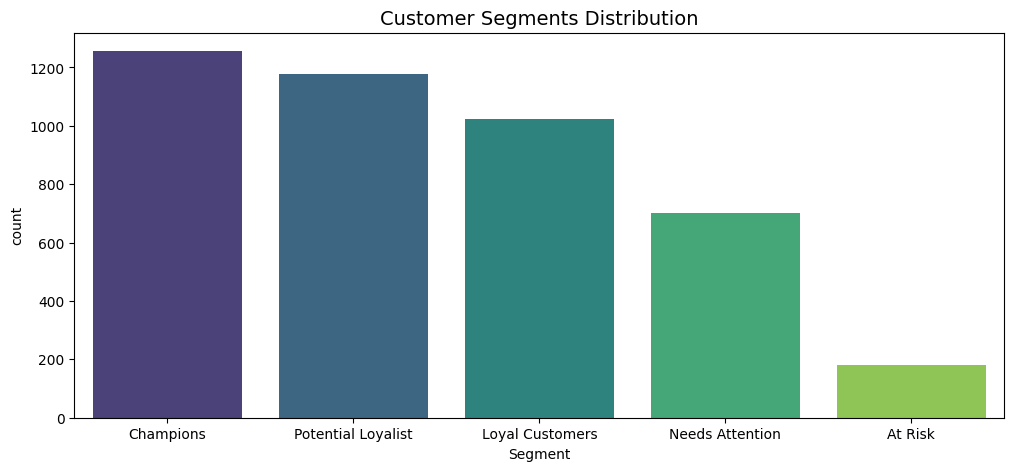

In [25]:
# Bar Chart: Segment Distribution
plt.figure(figsize=(12,5))
sns.countplot(
    data=rfm,
    x='Segment',  
    order=rfm['Segment'].value_counts().index,
    palette="viridis",
    legend=False     
)
plt.title("Customer Segments Distribution", fontsize=14)
plt.show();

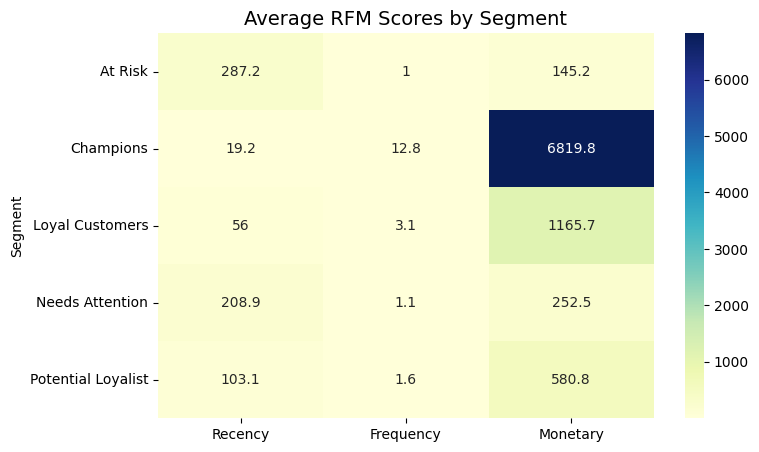

In [48]:
# Heatmap of Average RFM Scores per Segment
rfm_heatmap = rfm.groupby("Segment")[["Recency","Frequency","Monetary"]].mean().round(1)

plt.figure(figsize=(8,5))
sns.heatmap(rfm_heatmap, annot=True, cmap="YlGnBu", fmt="g")
plt.title("Average RFM Scores by Segment", fontsize=14)
plt.show()

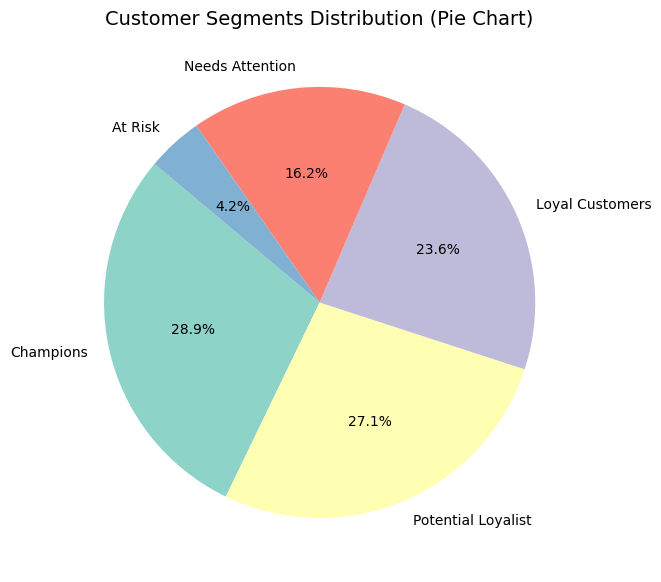

In [ ]:
# Pie Chart of Customer Segments
segment_counts = rfm['Segment'].value_counts()

plt.figure(figsize=(7,7))
plt.pie(segment_counts, labels=segment_counts.index, autopct='%1.1f%%', startangle=140, colors=plt.cm.Set3.colors)
plt.title("Customer Segments Distribution (Pie Chart)", fontsize=14)
plt.show()

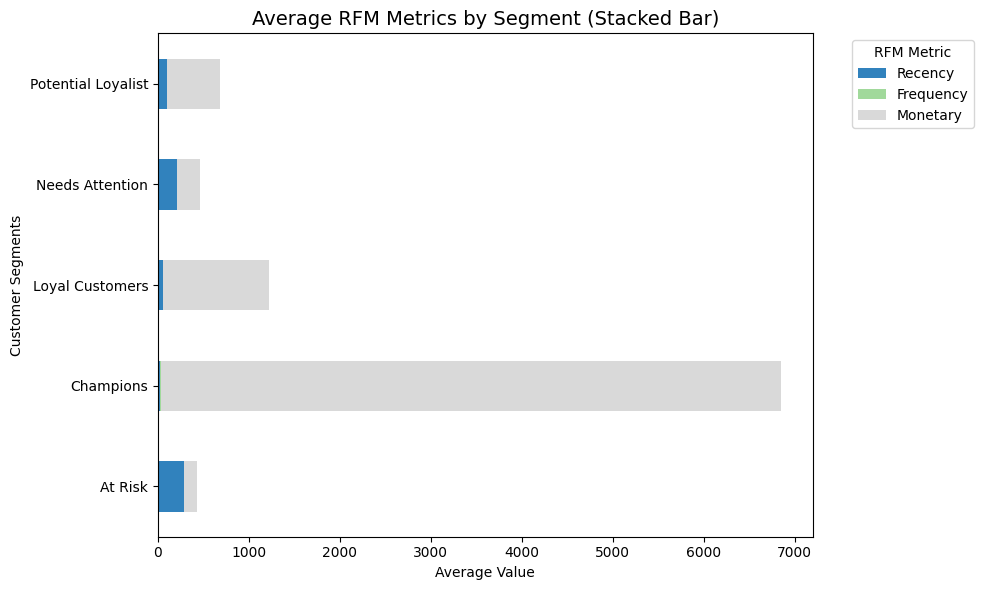

In [32]:
# Compute average R, F, M per segment
rfm_avg = rfm.groupby("Segment")[["Recency","Frequency","Monetary"]].mean()

# Plot stacked horizontal bar chart with a better colour palette
rfm_avg.plot(
    kind="barh",             # horizontal bars
    stacked=True, 
    figsize=(10,6), 
    colormap="tab20c"          # nicer pastel colours (alternatives: "Set3", "Paired", "tab20c")
)

plt.title("Average RFM Metrics by Segment (Stacked Bar)", fontsize=14)
plt.xlabel("Average Value")
plt.ylabel("Customer Segments")
plt.legend(title="RFM Metric", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.tight_layout()
plt.show()
